In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [45]:
def eoq(order_cost, demand, holding_cost, cost_arr, quant_arr, incre=False):
    df, tot_cost, eoq, feasibility = {}, [], [], []
    
    if incre == False:
        for i in range(len(cost_arr)):
            eoq.append((2*order_cost*demand/(holding_cost*cost_arr[i]))**0.5)
            tot_cost.append((order_cost*demand/eoq[i]) + (holding_cost*cost_arr[i]*eoq[i]/2) + demand*cost_arr[i])
        for i in range(1, len(quant_arr)):
            tot_cost.append((order_cost*demand/quant_arr[i]) + (holding_cost*cost_arr[i]*quant_arr[i]/2) + demand*cost_arr[i])
            eoq.append(quant_arr[i])

    
    elif incre == True:
        purc_cost, f = [0], []
        for i in range(len(cost_arr)):
            if i != 0:
                f.append(sum(f) + cost_arr[i-1]*(quant_arr[i]-quant_arr[i-1]))
                purc_cost.append(f[i-1] - cost_arr[i]*(quant_arr[i]-1))
        for i in range(len(cost_arr)):
            eoq.append((2*(order_cost + purc_cost[i])*demand/(holding_cost*cost_arr[i]))**0.5)
            tot_cost.append(
                ((order_cost + purc_cost[i])*demand/eoq[i]) + 
                (holding_cost*cost_arr[i]*eoq[i]/2) + demand*cost_arr[i] + holding_cost*purc_cost[i]/2
            )
        for i in range(1, len(quant_arr)):
            tot_cost.append(
                ((order_cost + purc_cost[i])*demand/quant_arr[i]) + 
                (holding_cost*cost_arr[i]*quant_arr[i]/2) + demand*cost_arr[i] + holding_cost*purc_cost[i]/2
            )
            eoq.append(quant_arr[i])


    min_pt_counts = len(quant_arr) - 1
    quant_arr.append(np.inf)
    for i in range(len(eoq)-min_pt_counts):
        if eoq[i] >= quant_arr[i] and eoq[i] < quant_arr[i+1]:
            feasibility.append(True)
        else:
            feasibility.append(False)
    for i in range(min_pt_counts):
        feasibility.append(True)

    df['Total Cost'] = tot_cost
    df['EOQ'] = eoq
    df['Feasible?'] = feasibility
    df = pd.DataFrame(df)
    df_feasible = df[df['Feasible?']==True]
#     ans = df[df['G(Q)']==min(df_feasible['G(Q)'])]
#     return ans['G(Q)']
    optimal_eoq = df[df['Total Cost']==min(df_feasible['Total Cost'])]['EOQ'].values
    print(df[df['Total Cost']==min(df_feasible['Total Cost'])])
    print(f"Length of order cycle\t{(int(optimal_eoq)/demand)*365} days")
#     print(f"Length of order cycle\t{min(df_feasible['EO'])}")
    return df


In [46]:
q = [1, 500, 1000]
c = [0.3, 0.29, 0.28]
eoq(order_cost=8, demand=600, holding_cost=0.2, cost_arr=c, quant_arr=q, incre=False)

   Total Cost    EOQ  Feasible?
3       198.1  500.0       True
Length of order cycle	304.1666666666667 days


,Total Cost,EOQ,Feasible?
0,204.000000,400.000000,True
1,197.596610,406.838102,False
2,191.186203,414.039336,False
3,198.100000,500.000000,True
4,200.800000,1000.000000,True


In [44]:
q = [1, 500, 1000]
c = [0.3, 0.29, 0.28]
eoq(order_cost=8, demand=600, holding_cost=0.2, cost_arr=c, quant_arr=q, incre=True)

   Total Cost    EOQ  Feasible?
0       204.0  400.0       True
Length of order cycle	243.33333333333331 days


,Total Cost,EOQ,Feasible?
0,204.000000,400.000000,True
1,204.567322,518.419348,True
2,208.795023,701.732550,False
3,204.587000,500.000000,True
4,211.286000,1000.000000,True


In [253]:
q = [1, 56, 100]
c = [18, 16, 12]
eoq(order_cost=45, demand=100, holding=0.2, cost_arr=c, quant_arr=q)

     G(Q)    EOQ  Feasible?
4  1365.0  100.0       True


,G(Q),EOQ,Feasible?
0,1980.000000,50.000000,True
1,1769.705627,53.033009,False
2,1346.969385,61.237244,False
3,1769.957143,56.000000,True
4,1365.000000,100.000000,True


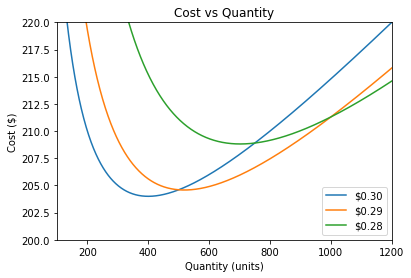

In [14]:
x = np.linspace(100, 1200, 1100)
y1 = f(K=8, lamb=600, h=0.2, Q=x, c=0.3)
y2 = f(K=8, lamb=600, h=0.2, Q=x, c=0.29, purc=5)
y3 = f(K=8, lamb=600, h=0.2, Q=x, c=0.28, purc=15)

plt.plot(x, y1, label='$0.30')
plt.plot(x, y2, label='$0.29')
plt.plot(x, y3, label='$0.28')
plt.axis([100, 1200, 200, 220])
plt.title('Cost vs Quantity')
plt.xlabel('Quantity (units)')
plt.ylabel('Cost ($)')
plt.legend()

In [4]:
def f(K, lamb, h, Q, c, purc=None):
    res = []
    for q in Q:
        if purc == None:
            res.append((K*lamb/q) + (h*c*q/2) + (lamb*c))
        elif purc != None:
            res.append(((K + purc)*lamb/q) + (h*c*q/2) + (lamb*c) + (h*purc/2))
    return res

[231.0,
 230.55435162186754,
 230.11803853799455,
 229.6907886064106,
 229.27234016130149,
 228.86244151371264,
 228.46085048053828,
 228.0673339399454,
 227.6816674115168,
 227.30363465952504,
 226.93302731786397,
 226.56964453527053,
 226.2132926395682,
 225.8637848197527,
 225.520940824823,
 225.18458667833818,
 224.85455440775036,
 224.53068178762823,
 224.2128120959476,
 223.900793882679,
 223.59448074995464,
 223.2937311431445,
 222.99840815221484,
 222.70837932278403,
 222.4235164763271,
 222.14369553901722,
 221.86879637872303,
 221.5987026497128,
 221.33330164464303,
 221.07248415343605,
 220.81614432867593,
 220.5641795571732,
 220.31649033737204,
 220.07298016229154,
 219.83355540771188,
 219.5981252253335,
 219.36660144065294,
 219.13889845531432,
 218.914933153709,
 218.69462481360972,
 218.47789502063722,
 218.26466758636883,
 218.05486846990945,
 217.84842570275543,
 217.64526931679117,
 217.44533127526677,
 217.24854540661434,
 217.05484734096703,
 216.86417444925348,
 